In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
dados_completo = pd.read_json('TelecomX_Data.json')

# Criação da nova coluna ChargesDaily

In [4]:
dados_completo['ChargesDaily'] = round(dados_completo['ChargesMonthly'] / 30, 2)

# Análise total de planos cancelados

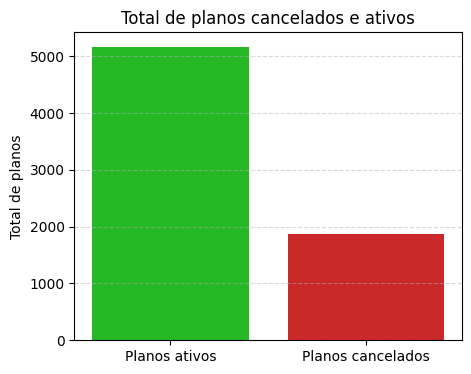

In [39]:
percentul_churn = dados_completo['Churn'].value_counts()
plt.figure(figsize=(5,4))

plt.bar(height=percentul_churn, x=['Planos ativos', 'Planos cancelados'], color=['#24B824', '#CA2929'])
plt.grid(linestyle="--", axis='y', alpha=0.5)
plt.title('Total de planos cancelados e ativos')
plt.ylabel('Total de planos')
plt.show()

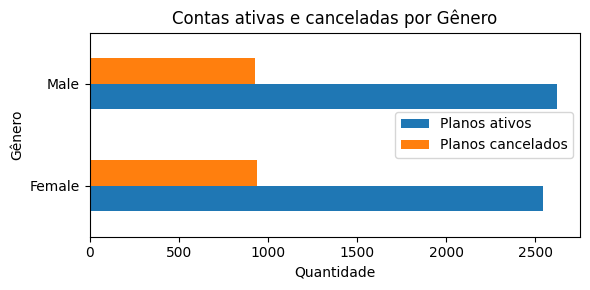

In [36]:
data = dados_completo.groupby(['gender', 'Churn']).size().unstack()

data.plot(kind='barh', figsize=(6,3))

plt.title('Contas ativas e canceladas por Gênero')
plt.xlabel('Quantidade')
plt.ylabel('Gênero')
plt.legend(title='', labels=['Planos ativos', 'Planos cancelados'] )
plt.tight_layout()
plt.show()

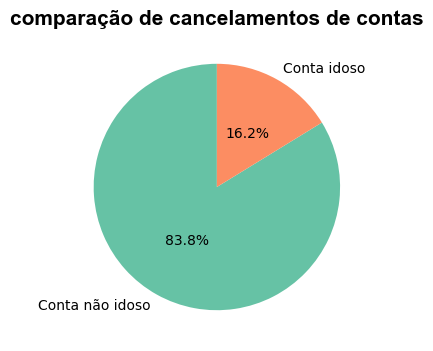

In [7]:
df_SeniorCitizen_counts = dados_completo['SeniorCitizen'].value_counts(normalize=True)

custom_labels = ['Conta não idoso','Conta idoso']

fig, ax = plt.subplots(figsize=(6, 4))
pie_colors = ['#66c2a5', '#fc8d62']
ax.pie(df_SeniorCitizen_counts,
        labels=custom_labels,
        autopct='%1.1f%%', startangle=90, # Opcional: começa o primeiro slice no topo
        pctdistance=0.5, # Distância das porcentagens do centro (0 a 1)
        labeldistance=1.1, # Distância dos rótulos das categorias do centro (0 a 1)
        colors=pie_colors)
plt.title('comparação de cancelamentos de contas', fontdict={'fontsize': 15, 'fontname': 'Arial'}, fontweight='bold')
plt.show()


In [8]:
df_idosos = dados_completo[dados_completo['SeniorCitizen']==True]
df_churn_senior_citizen_pie = df_idosos.groupby(dados_completo['SeniorCitizen'])['Churn'].value_counts(normalize=True)

In [9]:
custom_labels_idosos = ['Idoso com conta ativa', 'Idoso com conta cancelada']

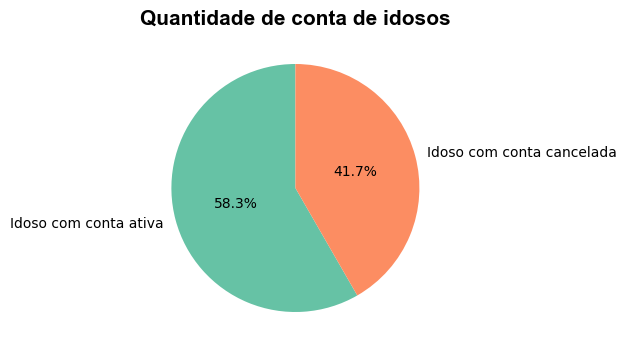

In [27]:
fig, ax = plt.subplots(figsize=(4,6))
pie_colors = ['#66c2a5', '#fc8d62']
ax.pie(df_churn_senior_citizen_pie,
        labels=custom_labels_idosos,
        autopct='%1.1f%%', startangle=90, # Opcional: começa o primeiro slice no topo
        pctdistance=0.5, # Distância das porcentagens do centro (0 a 1)
        labeldistance=1.1, # Distância dos rótulos das categorias do centro (0 a 1)
        colors=pie_colors)
plt.title('Quantidade de conta de idosos', fontdict={'fontsize': 15, 'fontname': 'Arial'}, fontweight='bold')
plt.show()

In [11]:
churn_counts_gender = dados_completo.groupby('gender')['Churn'].value_counts()

# utilizar para plotar gráfico

In [12]:
# Criando variáveis dos quantis da coluna de gastos mensais
q1 = dados_completo['ChargesMonthly'].quantile(q=0.25)
q2 = dados_completo['ChargesMonthly'].quantile(q=0.5)
q3 = dados_completo['ChargesMonthly'].quantile(q=0.75)


In [13]:
charges_monthly_q1 = dados_completo.query('ChargesMonthly < @q1')
charges_monthly_q2 = dados_completo.query('ChargesMonthly < @q2')
charges_monthly_q3 = dados_completo.query('ChargesMonthly < @q3')
charges_monthly_q4 = dados_completo.query('ChargesMonthly > @q3')
charges_monthly_teste = dados_completo.query('ChargesMonthly < 50')

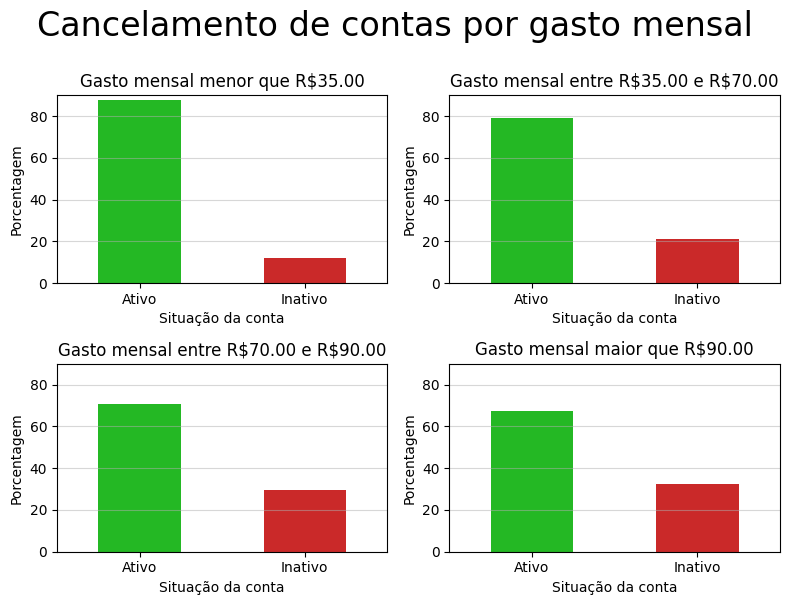

In [40]:

quantis = {
    'Gasto mensal menor que R\\$35.00': charges_monthly_q1,
    'Gasto mensal entre R\\$35.00 e R\\$70.00': charges_monthly_q2,
    'Gasto mensal entre R\\$70.00 e R\\$90.00': charges_monthly_q3,
    'Gasto mensal maior que R\\$90.00': charges_monthly_q4
}

posicoes = {
    'Gasto mensal menor que R\\$35.00': (0, 0),
    'Gasto mensal entre R\\$35.00 e R\\$70.00': (0, 1),
    'Gasto mensal entre R\\$70.00 e R\\$90.00': (1, 0),
    'Gasto mensal maior que R\\$90.00': (1, 1)
}

custom_labels_charge = ['Ativo', 'Inativo']
fig, axs = plt.subplots(2, 2, figsize=(8, 6))
fig.suptitle('Cancelamento de contas por gasto mensal', fontsize=24, y=1)

for nome, df in quantis.items():
    pos = posicoes[nome]
    soma_por_churn = df.groupby('Churn')['ChargesMonthly'].sum()
    percentul_churn = soma_por_churn / soma_por_churn.sum() * 100
    # percentul_churn = percentul_churn.round(2)
    percentul_churn.plot(
        kind='bar',
        ax=axs[pos[0], pos[1]],
        color=["#24B824", "#CA2929"]
    )
    axs[pos[0], pos[1]].set_title(nome)
    axs[pos[0], pos[1]].set_xticklabels(custom_labels_charge, rotation=0)
    axs[pos[0], pos[1]].set_xlabel('Situação da conta')
    axs[pos[0], pos[1]].set_ylabel('Porcentagem')
    axs[pos[0], pos[1]].grid(visible=True, alpha=0.5, axis='y')
    axs[pos[0], pos[1]].set_ylim(0, 90)
    

plt.tight_layout()
plt.show()




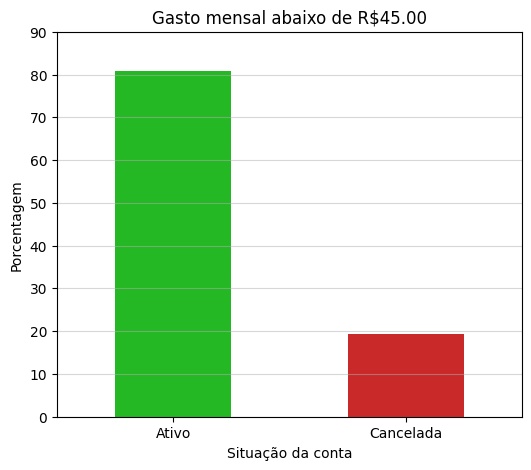

In [31]:
custom_labels_charge = ['Ativo', 'Cancelada']

soma_por_churn = charges_monthly_teste.groupby('Churn')['ChargesMonthly'].sum()
percentul_churn = soma_por_churn / soma_por_churn.sum() * 100

percentul_churn.plot(kind='bar', color=["#24B824", "#CA2929"],figsize=(6,5))
plt.title('Gasto mensal abaixo de R$45.00')
plt.xticks(ticks=[0, 1], labels=custom_labels_charge, rotation=0)
plt.xlabel('Situação da conta')
plt.ylabel('Porcentagem')
plt.grid(visible=True, alpha=0.5, axis='y')
plt.ylim(0, 90)

plt.show()




In [16]:
q1_ternure = dados_completo['tenure'].quantile(q=0.25)
q2_ternure = dados_completo['tenure'].quantile(q=0.5)
q3_ternure = dados_completo['tenure'].quantile(q=0.75)

In [17]:
ternure_q1 = dados_completo.query('tenure < @q1_ternure')
ternure_q2 = dados_completo.query('tenure < @q2_ternure')
ternure_q3 = dados_completo.query('tenure < @q3_ternure')
ternure_q4 = dados_completo.query('tenure > @q3_ternure')
# ternure_teste = dados_completo.query('tenure < 50')

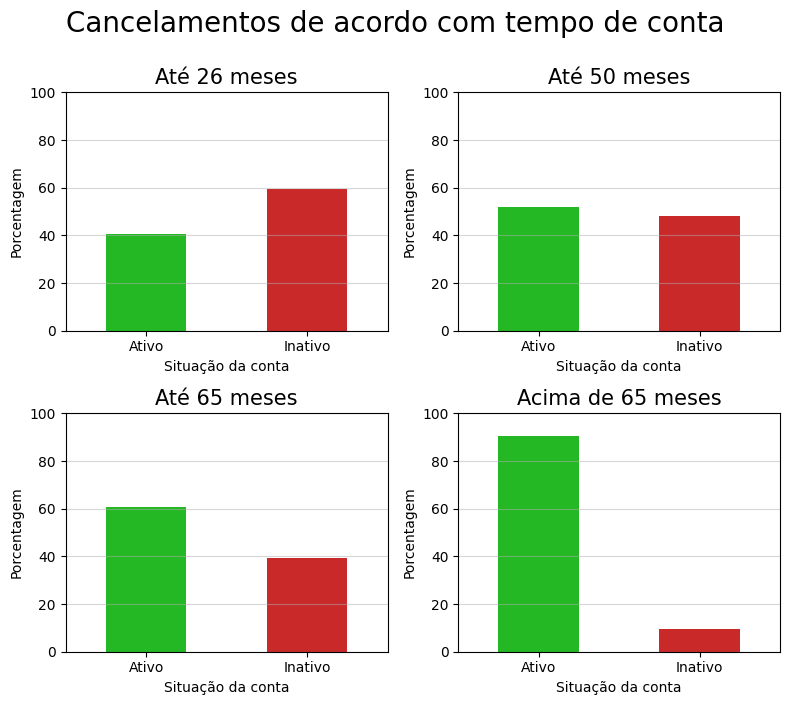

In [42]:
quantis = {
    'Até 26 meses': ternure_q1,
    'Até 50 meses': ternure_q2,
    'Até 65 meses': ternure_q3,
    'Acima de 65 meses': ternure_q4
}

posicoes = {
    'Até 26 meses': (0, 0),
    'Até 50 meses': (0, 1),
    'Até 65 meses': (1, 0),
    'Acima de 65 meses': (1, 1)
}

fig, axs = plt.subplots(2, 2, figsize=(8, 7))
plt.suptitle("Cancelamentos de acordo com tempo de conta", fontsize=20, y=1)


for nome, dados in quantis.items():
    pos = posicoes[nome]
    soma_por_churn = dados.groupby('Churn')['ChargesMonthly'].sum()
    percentul_churn = soma_por_churn / soma_por_churn.sum() * 100
    # percentul_churn = percentul_churn.round(2)
    percentul_churn.plot(
        kind='bar',
        ax=axs[pos[0], pos[1]],
        color=["#24B824", "#CA2929"]
    )
    axs[pos[0], pos[1]].set_title(nome, fontsize=15)
    axs[pos[0], pos[1]].set_xticklabels(custom_labels_charge, rotation=0)
    axs[pos[0], pos[1]].set_xlabel('Situação da conta')
    axs[pos[0], pos[1]].set_ylabel('Porcentagem')
    axs[pos[0], pos[1]].grid(visible=True, alpha=0.5, axis='y')
    axs[pos[0], pos[1]].set_ylim(0, 100)
    

plt.tight_layout()
plt.show()


In [19]:
contract_df = pd.DataFrame(dados_completo.groupby('Contract')['Churn'].value_counts())
contract_df

count
Contract       Churn       
Month-to-month False   2220
               True    1655
One year       False   1306
               True     166
Two year       False   1637
               True      48

In [20]:
# 1. Reorganiza os dados: cada linha será um status de conta (Churn), colunas serão os gêneros
contract_pivot_df = contract_df['count'].unstack(level=0)
contract_pivot_df

Contract,Month-to-month,One year,Two year
Churn,,,
False,2220,1306,1637
True,1655,166,48


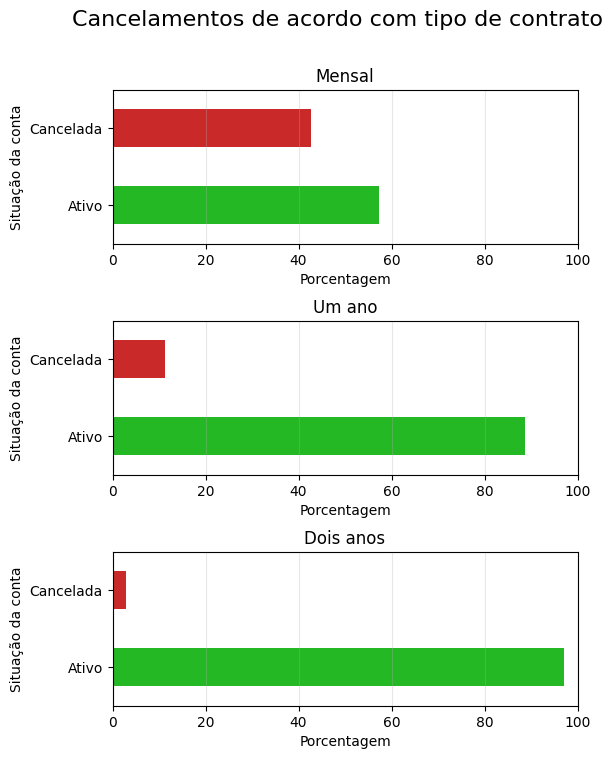

In [32]:
contract_titles = ['Mensal', 'Um ano', 'Dois anos']
contract_keys = ['Month-to-month', 'One year', 'Two year']
colors = ["#24B824", "#CA2929"]

fig, axs = plt.subplots(3, 1, figsize=(6, 8))
plt.suptitle("Cancelamentos de acordo com tipo de contrato", fontsize=16)

for i, key in enumerate(contract_keys):
    percent = contract_pivot_df[key] / contract_pivot_df[key].sum() * 100
    percent.plot(kind='barh', color=colors, ax=axs[i])

    axs[i].set_title(contract_titles[i])
    axs[i].set_yticklabels(custom_labels_charge, rotation=0)
    axs[i].set_ylabel('Situação da conta')
    axs[i].set_xlabel('Porcentagem')
    axs[i].grid(visible=True, alpha=0.3, axis='x')
    axs[i].set_xlim(0, 100)

plt.subplots_adjust(hspace=0.5)
plt.show()


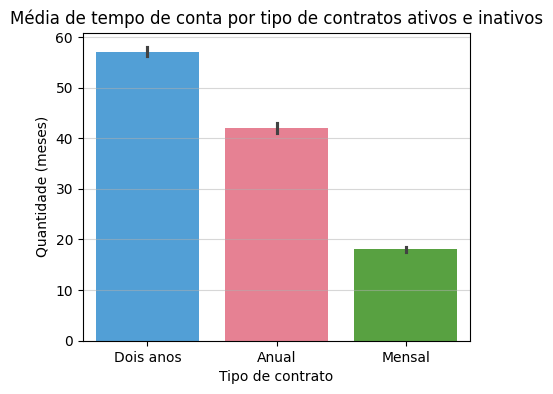

In [33]:
import seaborn as sns
ordem = dados_completo.groupby('Contract')['tenure'].mean().sort_values(ascending=False).index
labels_y = ['Mensal' if i == 'Month-to-month' else
            'Anual' if i == 'One year' else
            'Dois anos' if i == 'Two year' else i
            for i in ordem]

plt.figure(figsize=(5,4))

sns.barplot(x=dados_completo['Contract'], y=dados_completo['tenure'], order=ordem, hue=dados_completo['Contract'], palette='husl')
plt.xlabel('Tipo de contrato')
plt.ylabel('Quantidade (meses)')
plt.title('Média de tempo de conta por tipo de contratos ativos e inativos')
plt.grid(linestyle='-', axis='y', alpha=0.5)
plt.xticks(np.arange(3), labels=labels_y)


plt.show()


In [23]:
df_active_accounts = dados_completo.query('Churn == False')

In [24]:
df_active_accounts.reset_index(drop=True,inplace=True)

In [25]:
contract_duration = {
    'Month-to-month': 1,
    'One year': 12,
    'Two year': 24
}

# Adiciona coluna com duração do contrato em meses
df_active_accounts.loc[:, 'contract_duration'] = df_active_accounts['Contract'].map(contract_duration)
# Filtra os clientes cujo tenure é maior que o tempo de contrato
df_filtered = df_active_accounts[df_active_accounts['tenure'] > df_active_accounts['contract_duration']]

C:\Users\bruno\AppData\Local\Temp\ipykernel_21736\3059912286.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_active_accounts.loc[:, 'contract_duration'] = df_active_accounts['Contract'].map(contract_duration)


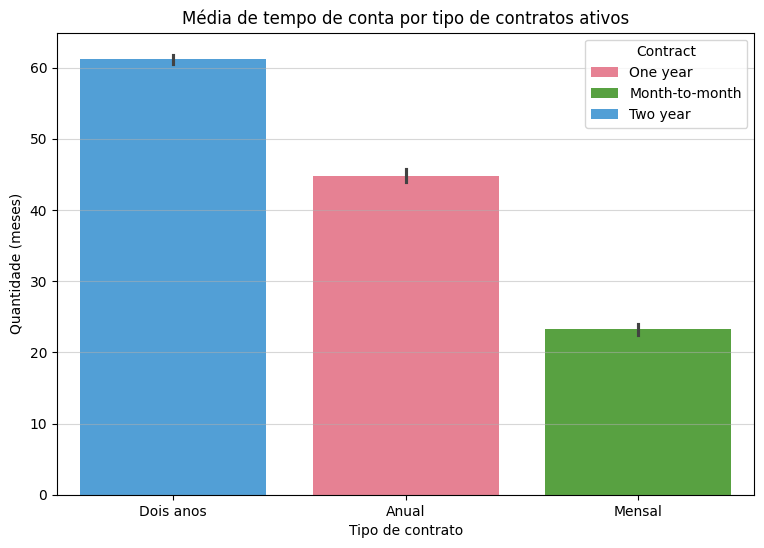

In [26]:
ordem = df_filtered.groupby('Contract')['tenure'].mean().sort_values(ascending=False).index
labels_y = ['Mensal' if i == 'Month-to-month' else
            'Anual' if i == 'One year' else
            'Dois anos' if i == 'Two year' else i
            for i in ordem]

plt.figure(figsize=(9,6))

sns.barplot(x=df_filtered['Contract'], y=df_filtered['tenure'], order=ordem, hue=df_active_accounts['Contract'], palette='husl')
plt.xlabel('Tipo de contrato')
plt.ylabel('Quantidade (meses)')
plt.title('Média de tempo de conta por tipo de contratos ativos')
plt.grid(linestyle='-', axis='y', alpha=0.5)
plt.xticks(np.arange(3), labels=labels_y)


plt.show()

# Relatório

Essa análise de dados foi feita para melhorar a estrutura dos dados da empresa e encontrar informações que possam ser uteis para a melhoria da empresa. Uma das informações mais importantes retiradas dessa análise foi a quantidade demasiada alta de evasão de cliente.

Foi feita uma reestruturação de algumas colunas da tabela e criação de outras. Além disso, todas as tabelas foram unidas em apenas uma tabela geral.

Na análise de evasão notou-se que cerca de 26% dos planos foram cancelados, não havendo grande relevancia entre gênero.

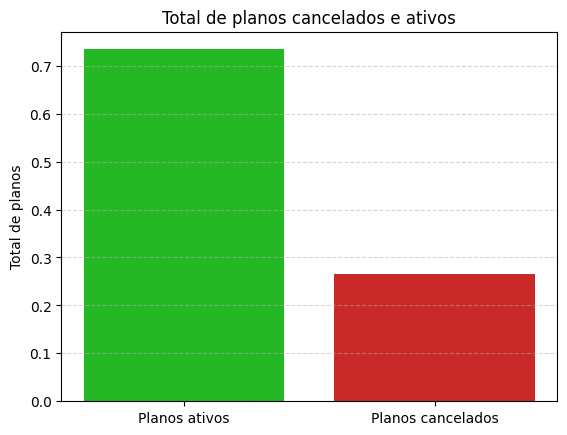 
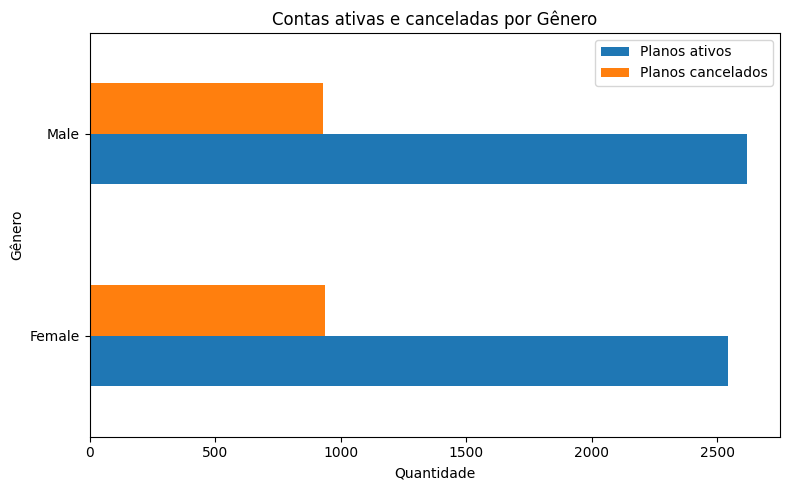

No entanto, notou-se uma grande quantidade de evasão dos clientes senior, onde mesmo sendo uma parcela muito menor no número total de evasão, pode ser um ponto de atenção.

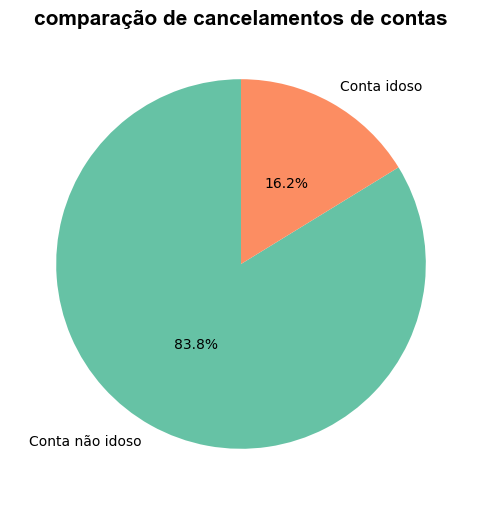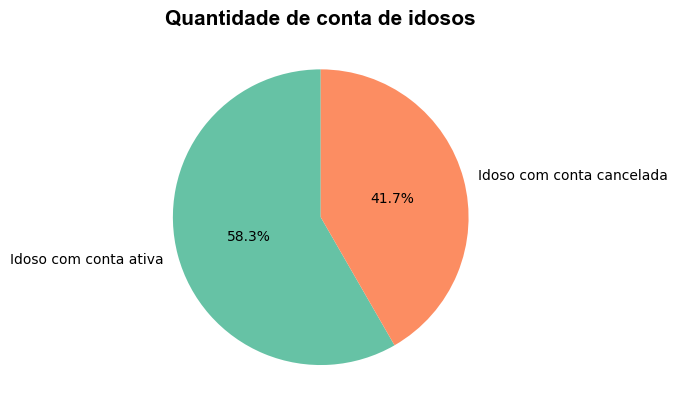

Notou-se também que quanto maior o gasto mensal, maior é a porcentagem de evasão, sendo que a menor porcentagem é de 20% onde o gasto máximo é de R$ 45,00.

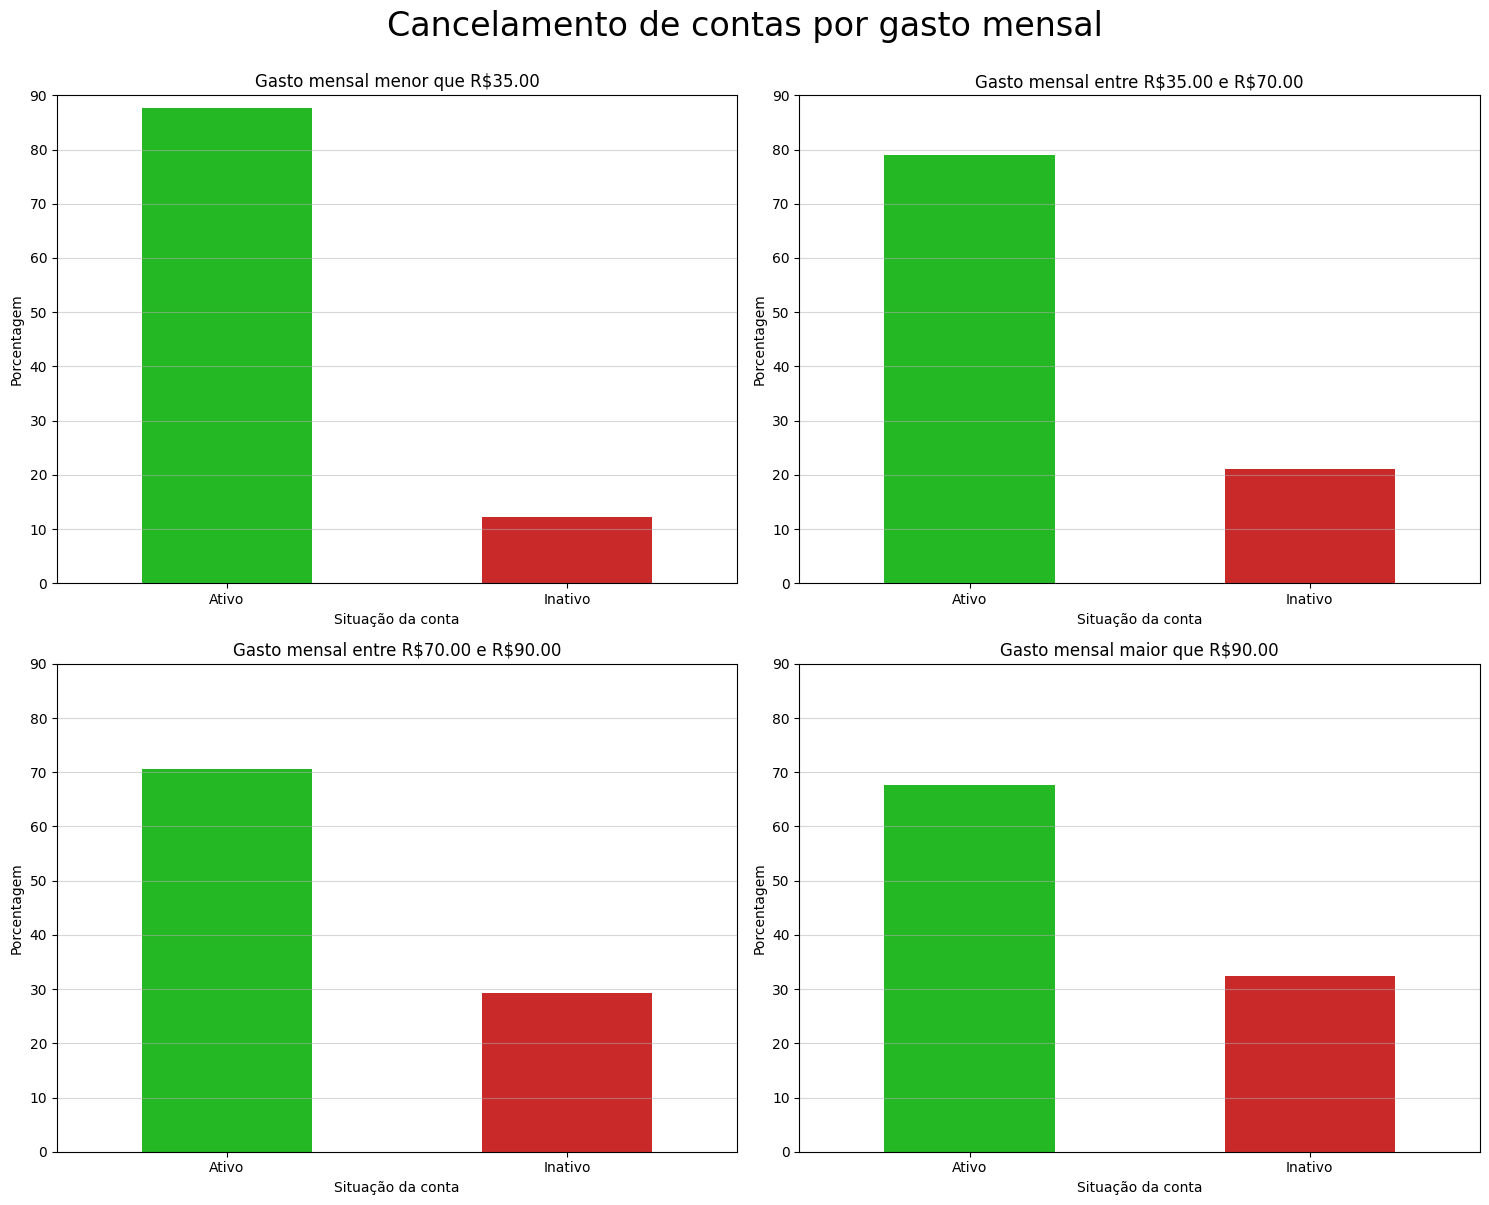 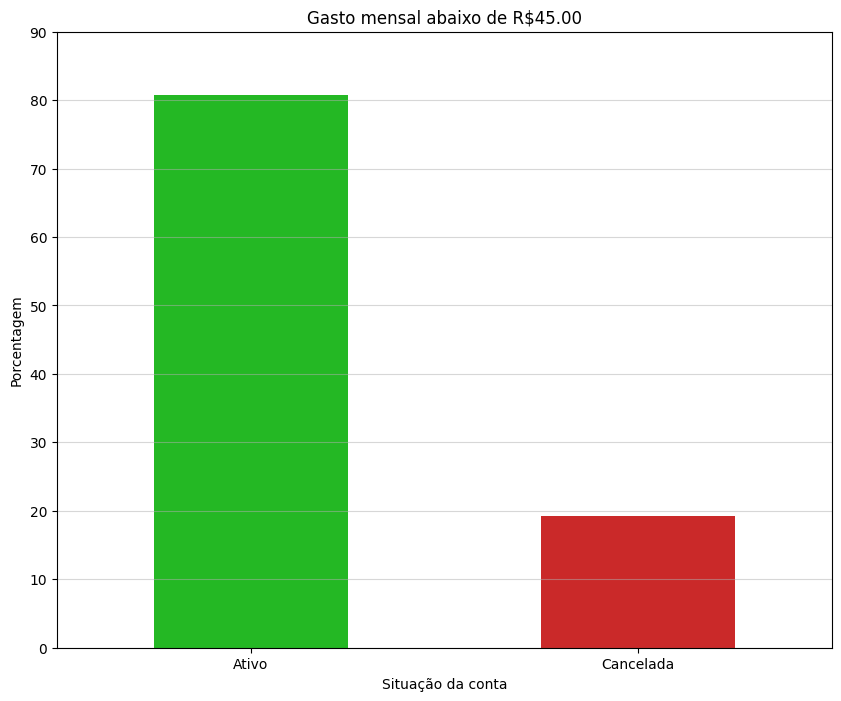

A quantidade de meses e o tipo de contrato também influeciam a taxa de permanencia, sendo que quanto mais tempo o cliente está assinando, menos chance ele tem de cancelar os serviços.

 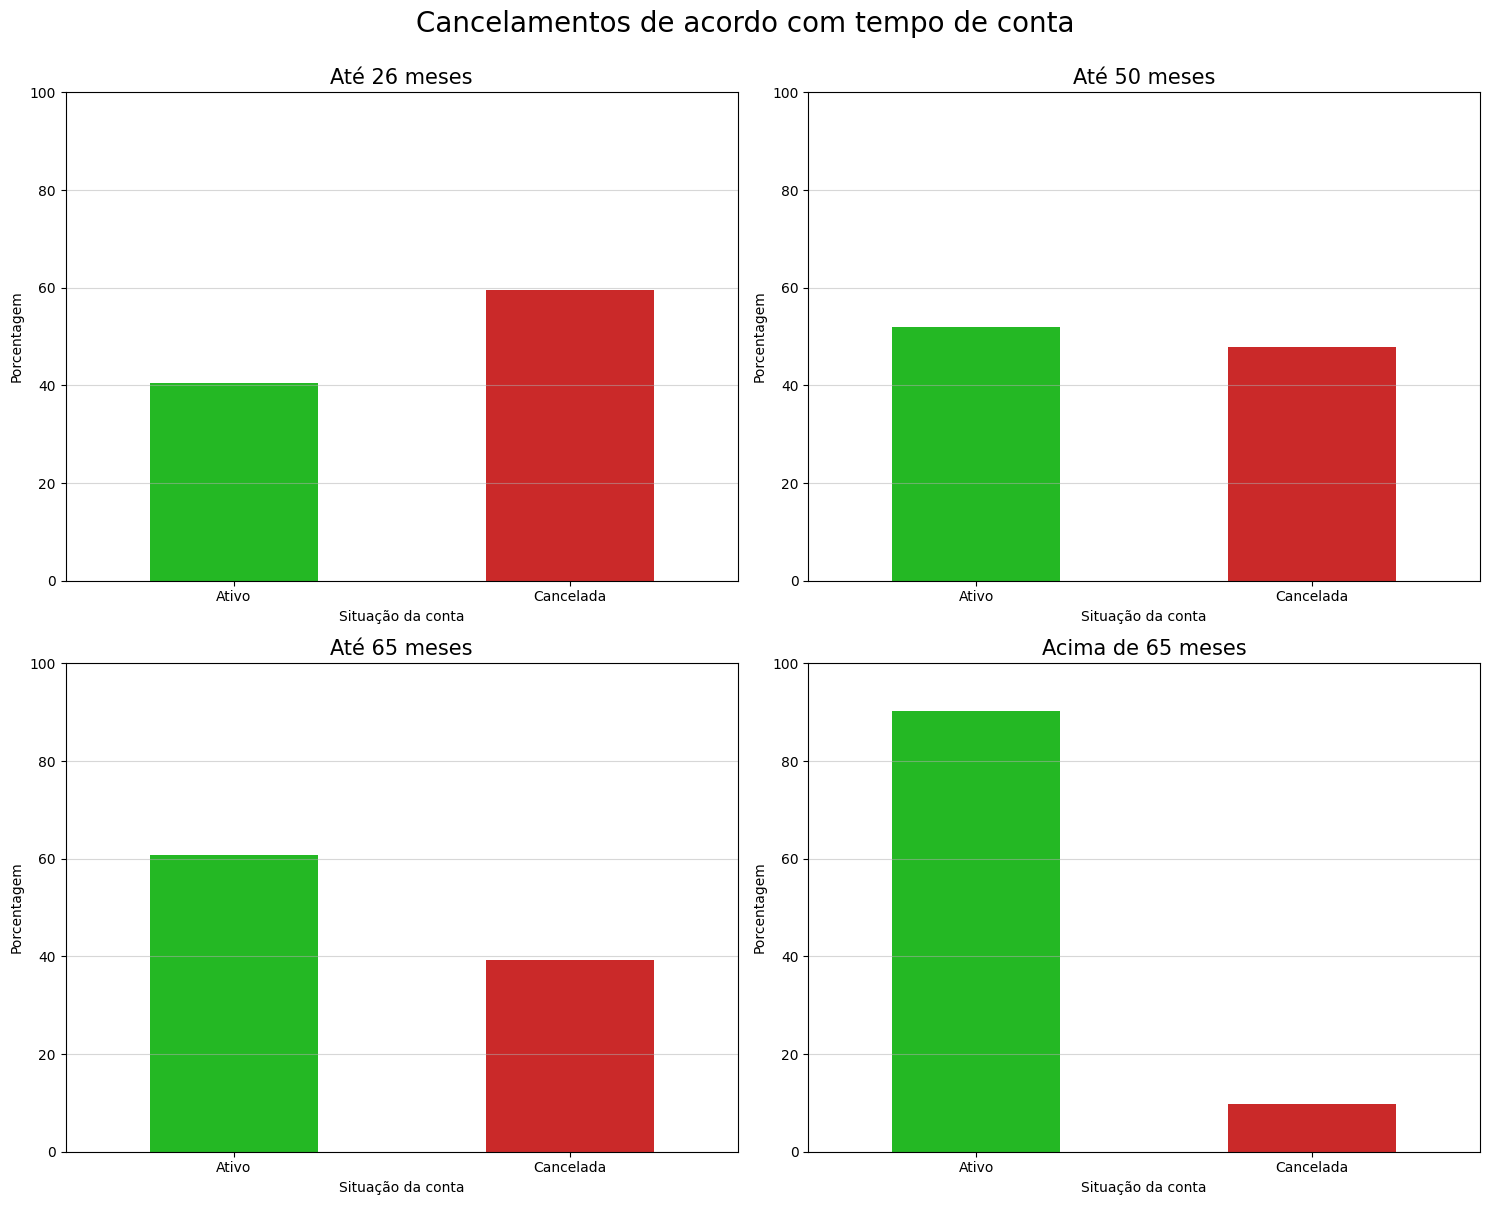

Outra análise útil é a porcentagem de cancelamento por tipo de contrato, onde os contratos de maior duração tendem a ter menos cancelamentos e também a média de meses que as contas permanecem ativas aumenta conforme a duração de cada contrato

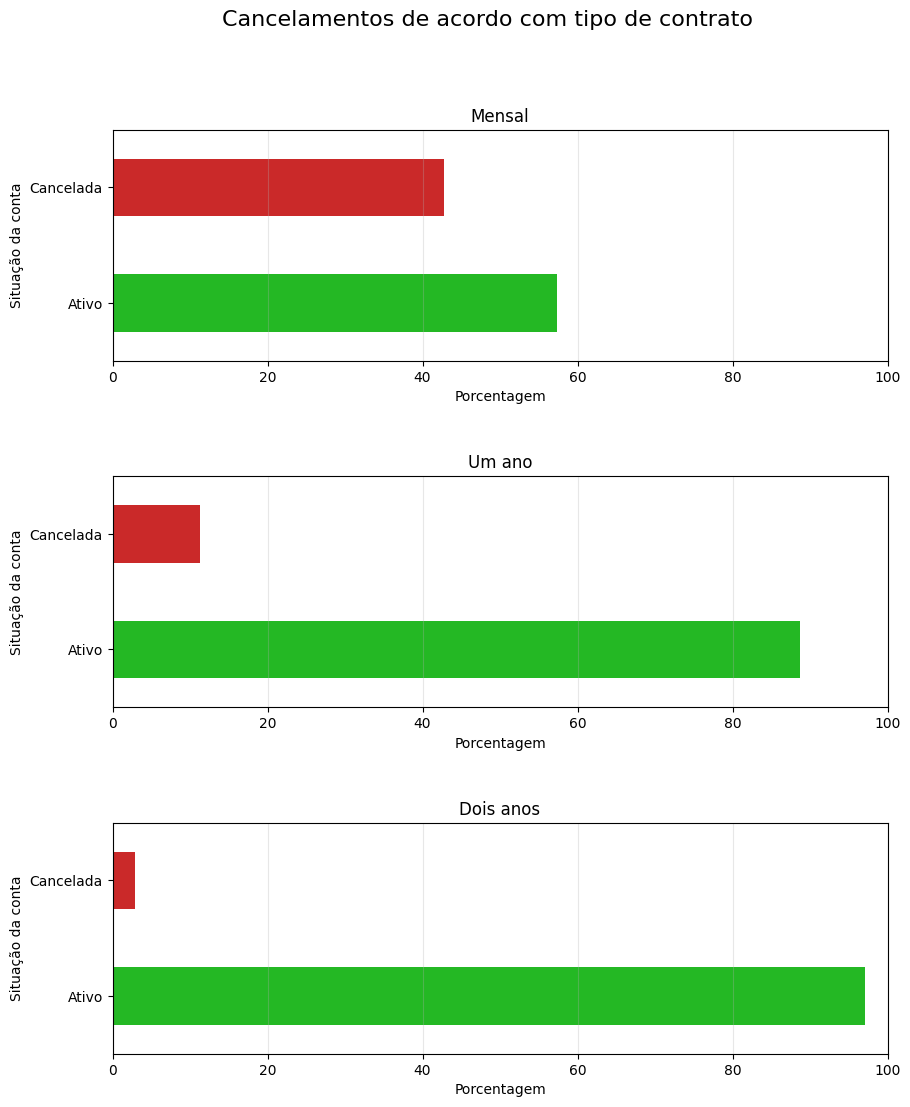
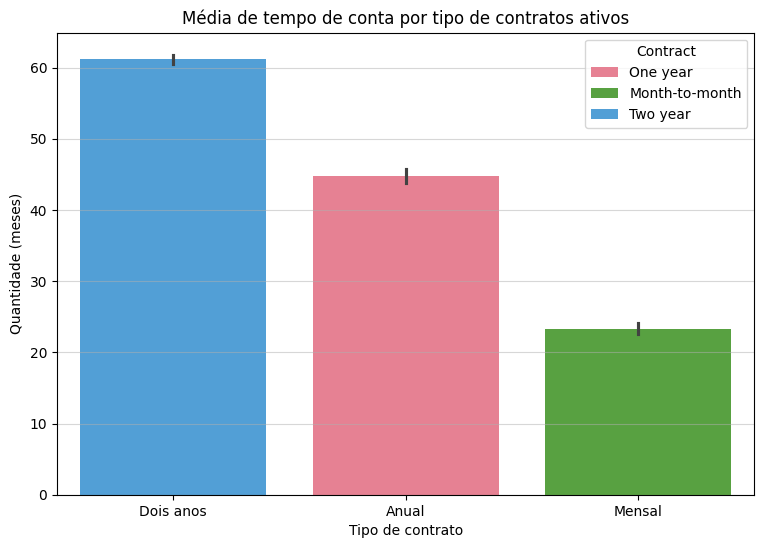

